In [355]:
## import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## read data

In [298]:
df=pd.read_csv("/kaggle/input/loan-eligibility-prediction/Loan Eligibility Prediction.csv")

In [299]:
df.head()

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y


In [300]:
df.shape

(614, 13)

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         614 non-null    int64  
 1   Gender              614 non-null    object 
 2   Married             614 non-null    object 
 3   Dependents          614 non-null    int64  
 4   Education           614 non-null    object 
 5   Self_Employed       614 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         614 non-null    int64  
 9   Loan_Amount_Term    614 non-null    int64  
 10  Credit_History      614 non-null    int64  
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 62.5+ KB


In [302]:
df.describe()

,Customer_ID,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,307.500000,0.856678,5403.459283,1621.245798,142.022801,338.892508,0.850163
std,177.390811,1.216651,6109.041673,2926.248369,87.083089,69.716355,0.357203
min,1.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,154.250000,0.000000,2877.500000,0.000000,98.000000,360.000000,1.000000
50%,307.500000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,460.750000,2.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,614.000000,4.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [303]:
df.duplicated().sum()

np.int64(0)

**EDA**

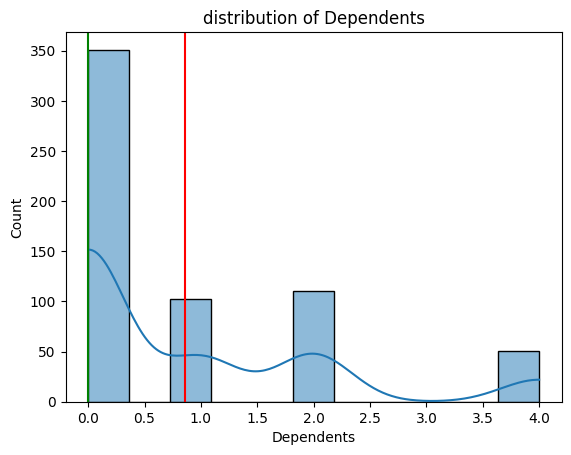

In [304]:
sns.histplot(data=df,x='Dependents',kde=True)
plt.title("distribution of Dependents")
plt.axvline(df.Dependents.mean(),color='r')
plt.axvline(df.Dependents.median(),color='g')

In [305]:
df['Dependents'].skew()

np.float64(1.3885720058468938)

In [306]:
px.box(data_frame=df,x='Dependents')

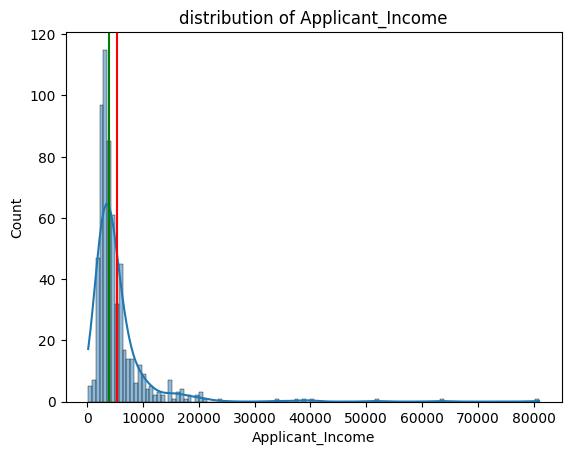

In [307]:
sns.histplot(data=df,x='Applicant_Income',kde=True)
plt.title("distribution of Applicant_Income")
plt.axvline(df.Applicant_Income.mean(),color='r')
plt.axvline(df.Applicant_Income.median(),color='g')

In [308]:
px.box(data_frame=df,x='Applicant_Income')

In [309]:
q1=df['Applicant_Income'].quantile(0.25)
q3=df['Applicant_Income'].quantile(0.75)
iqr=q3-q1
lowerbound=q1-(1.5*iqr)
upperbound=q3+(1.5*iqr)
print("lower bound = ",lowerbound)
print("upper bound = ",upperbound)



lower bound =  -1498.75
upper bound =  10171.25


In [310]:
df=df[(df['Applicant_Income']>lowerbound)&(df['Applicant_Income']<upperbound)]

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         564 non-null    int64  
 1   Gender              564 non-null    object 
 2   Married             564 non-null    object 
 3   Dependents          564 non-null    int64  
 4   Education           564 non-null    object 
 5   Self_Employed       564 non-null    object 
 6   Applicant_Income    564 non-null    int64  
 7   Coapplicant_Income  564 non-null    float64
 8   Loan_Amount         564 non-null    int64  
 9   Loan_Amount_Term    564 non-null    int64  
 10  Credit_History      564 non-null    int64  
 11  Property_Area       564 non-null    object 
 12  Loan_Status         564 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 61.7+ KB


In [312]:
px.box(data_frame=df,x='Applicant_Income')

In [313]:
px.box(data_frame=df,x='Coapplicant_Income')

In [314]:
q1=df['Coapplicant_Income'].quantile(0.25)
q3=df['Coapplicant_Income'].quantile(0.75)
iqr=q3-q1
lowerbound=q1-(1.5*iqr)
upperbound=q3+(1.5*iqr)
print("lower bound = ",lowerbound)
print("upper bound = ",upperbound)

lower bound =  -3505.5
upper bound =  5842.5


In [315]:
df=df[(df['Coapplicant_Income']>lowerbound)&(df['Coapplicant_Income']<upperbound)]

In [316]:
px.box(data_frame=df,x='Coapplicant_Income')

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         548 non-null    int64  
 1   Gender              548 non-null    object 
 2   Married             548 non-null    object 
 3   Dependents          548 non-null    int64  
 4   Education           548 non-null    object 
 5   Self_Employed       548 non-null    object 
 6   Applicant_Income    548 non-null    int64  
 7   Coapplicant_Income  548 non-null    float64
 8   Loan_Amount         548 non-null    int64  
 9   Loan_Amount_Term    548 non-null    int64  
 10  Credit_History      548 non-null    int64  
 11  Property_Area       548 non-null    object 
 12  Loan_Status         548 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 59.9+ KB


In [318]:
px.box(data_frame=df,x='Loan_Amount')

In [319]:
df=df[df['Loan_Amount']<292]

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         540 non-null    int64  
 1   Gender              540 non-null    object 
 2   Married             540 non-null    object 
 3   Dependents          540 non-null    int64  
 4   Education           540 non-null    object 
 5   Self_Employed       540 non-null    object 
 6   Applicant_Income    540 non-null    int64  
 7   Coapplicant_Income  540 non-null    float64
 8   Loan_Amount         540 non-null    int64  
 9   Loan_Amount_Term    540 non-null    int64  
 10  Credit_History      540 non-null    int64  
 11  Property_Area       540 non-null    object 
 12  Loan_Status         540 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 59.1+ KB


In [321]:
cor = df.corr(numeric_only=True)


<Axes: >

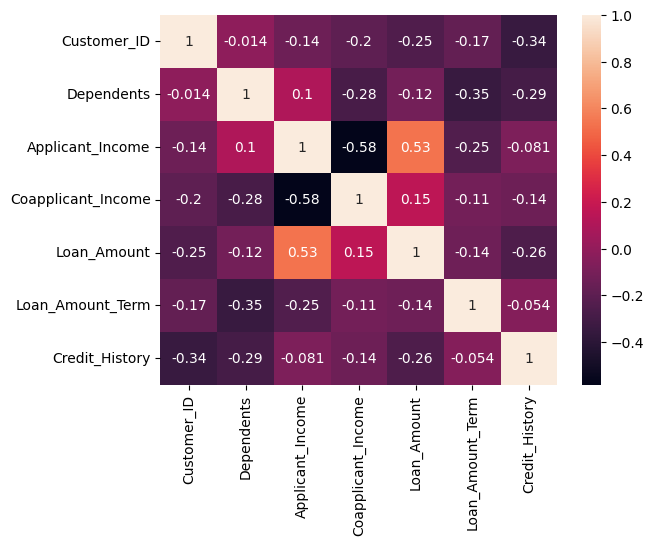

In [322]:
sns.heatmap(cor.corr(),annot=True)

In [323]:
px.scatter(data_frame=df,x='Loan_Amount',y='Applicant_Income',color='Loan_Status')

**data is not balance**

In [324]:
df['Loan_Status'].value_counts()

Loan_Status
Y    375
N    165
Name: count, dtype: int64

In [325]:
 px.histogram(df, x='Gender', color='Loan_Status', barmode='group',title='Loan Status by Gender')

Text(0.5, 1.0, 'Applicant Income vs Loan Status')

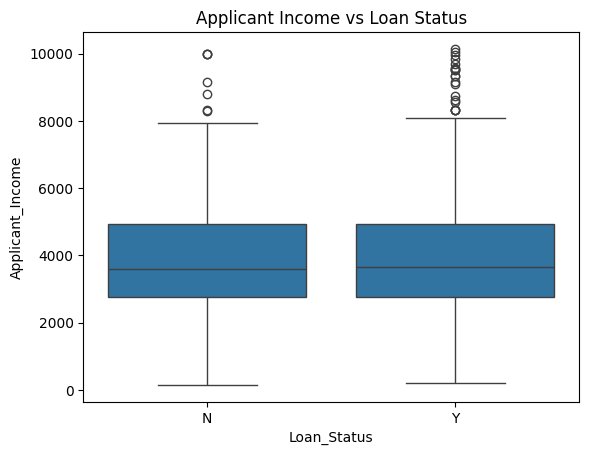

In [326]:
sns.boxplot(data=df, x='Loan_Status', y='Applicant_Income')
plt.title('Applicant Income vs Loan Status')

Text(0.5, 1.0, 'Loan Status by Credit History')

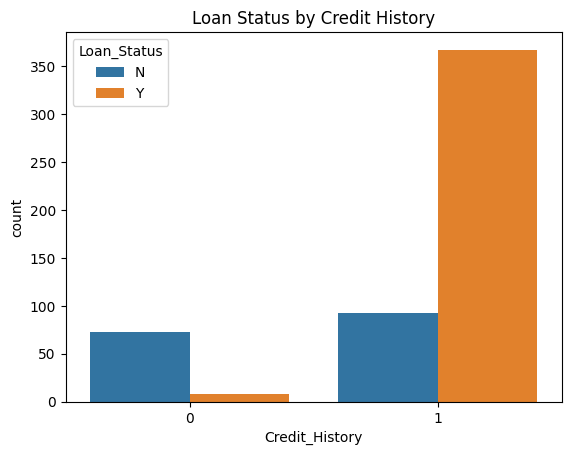

In [327]:
sns.countplot(data=df, x='Credit_History', hue='Loan_Status')
plt.title('Loan Status by Credit History')

Text(0.5, 1.0, 'Loan Status by Marital Status')

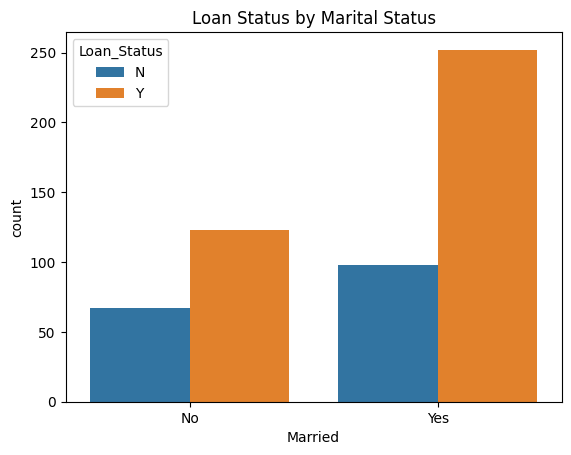

In [328]:
sns.countplot(data=df, x='Married', hue='Loan_Status')
plt.title('Loan Status by Marital Status')

In [329]:
 px.pie(df,names='Loan_Status',title='Loan Status Distribution')

**data un balanced**

In [330]:
df.select_dtypes('object').columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [331]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [332]:
df.drop(['Customer_ID'],axis=1,inplace=True)

## one hot [''Gender', 'Married', 'Education', 'Self_Employed','Property_Area']##
## label ['loan_status']

In [333]:
df.reset_index(drop=True,inplace=True)


## one hot encoding

In [334]:
df=pd.get_dummies(df,columns=['Gender','Married','Education','Self_Employed','Property_Area'],drop_first=True,dtype=int)

In [335]:
df.head()

,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,2378,0.0,9,360,1,N,0,0,0,0,0,1
1,2,1299,1086.0,17,120,1,Y,1,1,0,0,0,1
2,0,3620,0.0,25,120,1,Y,1,0,1,0,1,0
3,0,3459,0.0,25,120,1,Y,1,1,0,1,1,0
4,1,5468,1032.0,26,360,1,Y,1,1,0,0,1,0


In [336]:
df['Loan_Status']

0      N
1      Y
2      Y
3      Y
4      Y
      ..
535    N
536    N
537    N
538    Y
539    N
Name: Loan_Status, Length: 540, dtype: object

## binary encoding

In [337]:
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})


In [338]:
df

,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,2378,0.0,9,360,1,0,0,0,0,0,0,1
1,2,1299,1086.0,17,120,1,1,1,1,0,0,0,1
2,0,3620,0.0,25,120,1,1,1,0,1,0,1,0
3,0,3459,0.0,25,120,1,1,1,1,0,1,1,0
4,1,5468,1032.0,26,360,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,2,2947,1603.0,10,360,1,0,1,1,0,0,0,1
536,0,4680,2087.0,15,360,1,0,1,0,0,0,1,0
537,2,6633,0.0,25,360,0,0,1,1,0,1,0,0
538,1,2492,2375.0,30,360,1,1,1,1,1,0,0,0


In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               540 non-null    int64  
 1   Applicant_Income         540 non-null    int64  
 2   Coapplicant_Income       540 non-null    float64
 3   Loan_Amount              540 non-null    int64  
 4   Loan_Amount_Term         540 non-null    int64  
 5   Credit_History           540 non-null    int64  
 6   Loan_Status              540 non-null    int64  
 7   Gender_Male              540 non-null    int64  
 8   Married_Yes              540 non-null    int64  
 9   Education_Not Graduate   540 non-null    int64  
 10  Self_Employed_Yes        540 non-null    int64  
 11  Property_Area_Semiurban  540 non-null    int64  
 12  Property_Area_Urban      540 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 55.0 KB


## split data

In [340]:
x=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

In [341]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,
                                                 shuffle=True,random_state=42,stratify=y)

## scaling

In [342]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## models

In [343]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

## dictionary of models

In [344]:
models={
    "logistic regression":LogisticRegression(),
    "knn" : KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=1),
     "Random Forest":RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=10), #{"gini", "entropy", "log_loss"}
    "ExtraTrees": ExtraTreesClassifier(n_estimators=130,random_state=42),
    "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',max_depth=10),n_estimators=50,random_state=42),
}

## metrics 

In [345]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score ,confusion_matrix,classification_report

===== logistic regression =====
Train Accuracy: 0.8102,   Test Accuracy: 0.8241
[[15 18]
 [ 1 74]]


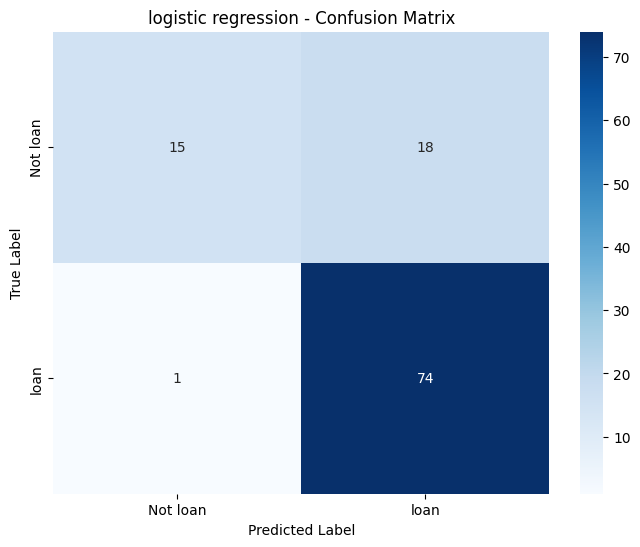

              precision    recall  f1-score   support

           0       0.94      0.45      0.61        33
           1       0.80      0.99      0.89        75

    accuracy                           0.82       108
   macro avg       0.87      0.72      0.75       108
weighted avg       0.85      0.82      0.80       108

===== knn =====
Train Accuracy: 0.8194,   Test Accuracy: 0.7778
[[14 19]
 [ 5 70]]


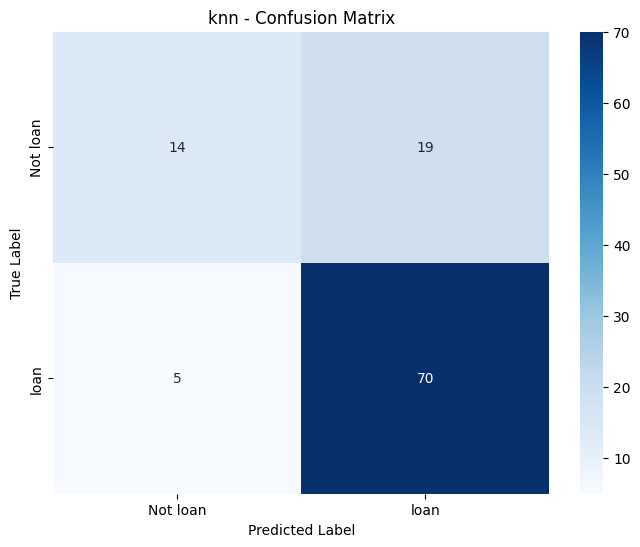

              precision    recall  f1-score   support

           0       0.74      0.42      0.54        33
           1       0.79      0.93      0.85        75

    accuracy                           0.78       108
   macro avg       0.76      0.68      0.70       108
weighted avg       0.77      0.78      0.76       108

===== Random Forest =====
Train Accuracy: 0.9282,   Test Accuracy: 0.8148
[[17 16]
 [ 4 71]]


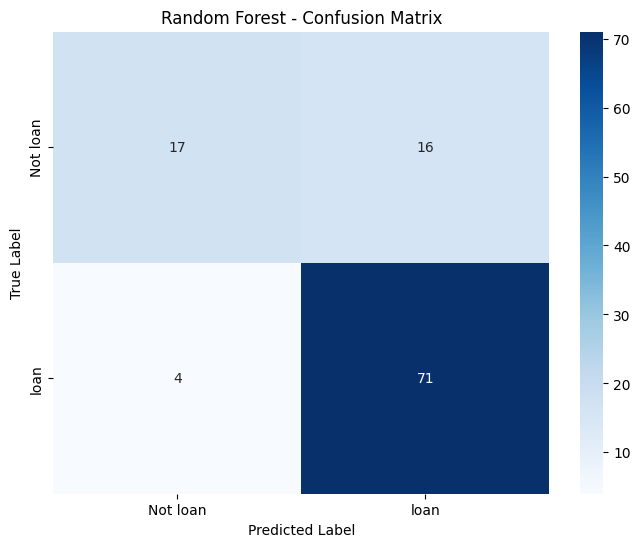

              precision    recall  f1-score   support

           0       0.81      0.52      0.63        33
           1       0.82      0.95      0.88        75

    accuracy                           0.81       108
   macro avg       0.81      0.73      0.75       108
weighted avg       0.81      0.81      0.80       108

===== ExtraTrees =====
Train Accuracy: 1.0000,   Test Accuracy: 0.7963
[[19 14]
 [ 8 67]]


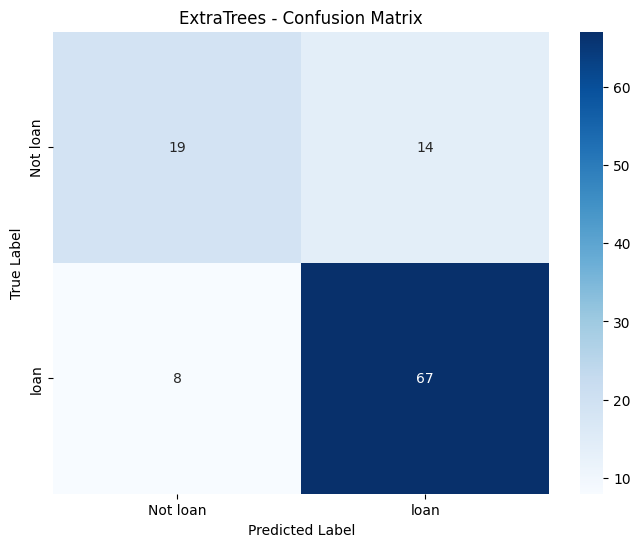

              precision    recall  f1-score   support

           0       0.70      0.58      0.63        33
           1       0.83      0.89      0.86        75

    accuracy                           0.80       108
   macro avg       0.77      0.73      0.75       108
weighted avg       0.79      0.80      0.79       108

===== Bagging =====
Train Accuracy: 0.9560,   Test Accuracy: 0.8148
[[17 16]
 [ 4 71]]


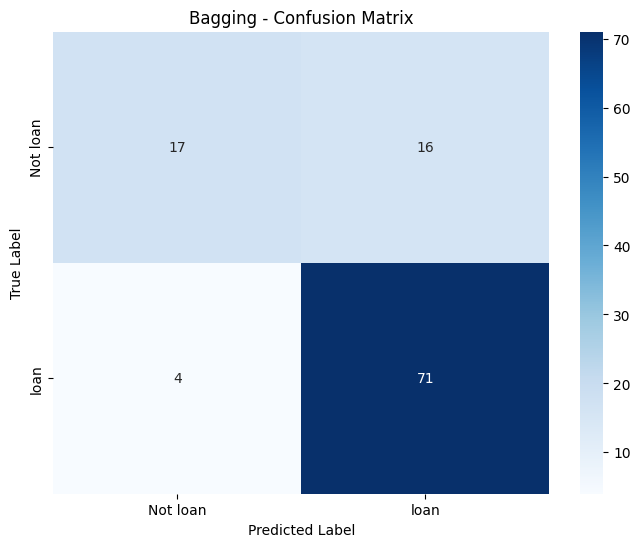

              precision    recall  f1-score   support

           0       0.81      0.52      0.63        33
           1       0.82      0.95      0.88        75

    accuracy                           0.81       108
   macro avg       0.81      0.73      0.75       108
weighted avg       0.81      0.81      0.80       108



In [346]:
accuracy=[]
for model_name , model in models.items():
    model.fit(x_train,y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    Acc_Train = accuracy_score(y_train,y_pred_train)
    Acc_Test  =  accuracy_score(y_test,y_pred_test)


    Pre_Train = precision_score(y_train,y_pred_train)
    Pre_Test  =  precision_score(y_test,y_pred_test)

    Rec_Train = recall_score(y_train,y_pred_train)
    Rec_Test  =  recall_score(y_test,y_pred_test)

    F1_Train = f1_score(y_train,y_pred_train)
    F1_Test  =  f1_score(y_test,y_pred_test)

    accuracy.append([Acc_Train,Pre_Train,Rec_Train,F1_Train,Acc_Test,Pre_Test,Rec_Test,F1_Test])
    print(f"===== {model_name} =====")
    print(f"Train Accuracy: {Acc_Train:.4f},   Test Accuracy: {Acc_Test:.4f}")
    class_names=['Not loan','loan']
    cm = confusion_matrix(y_test,y_pred_test)
    print(cm)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{model_name} - Confusion Matrix')

    plt.show()
    print(classification_report(y_test,y_pred_test))


## logistic is hightest accuracy is 82%

## =0 not balanced

In [347]:
from sklearn.metrics import balanced_accuracy_score
balance=balanced_accuracy_score(y_test,y_pred_test)
balance

np.float64(0.730909090909091)

In [348]:
pd.DataFrame(accuracy,columns=["Acc_Train","Pre_Train","Rec_Train","F1_Train",
                               "Acc_Test","Pre_Test","Rec_Test","F1_Test"],index=models.keys())

,Acc_Train,Pre_Train,Rec_Train,F1_Train,Acc_Test,Pre_Test,Rec_Test,F1_Test
logistic regression,0.810185,0.797814,0.973333,0.876877,0.824074,0.804348,0.986667,0.886228
knn,0.819444,0.810056,0.966667,0.881459,0.777778,0.786517,0.933333,0.853659
Random Forest,0.928241,0.906344,1.000000,0.950872,0.814815,0.816092,0.946667,0.876543
ExtraTrees,1.000000,1.000000,1.000000,1.000000,0.796296,0.827160,0.893333,0.858974
Bagging,0.956019,0.943218,0.996667,0.969206,0.814815,0.816092,0.946667,0.876543


## smote

In [349]:
from imblearn.over_sampling import SMOTE

In [350]:
Smote = SMOTE(k_neighbors=10)

In [351]:
X_resample,y_resample = Smote.fit_resample(x_train,y_train)

===== logistic regression =====
Train Accuracy: 0.7300,   Test Accuracy: 0.7593
[[22 11]
 [15 60]]


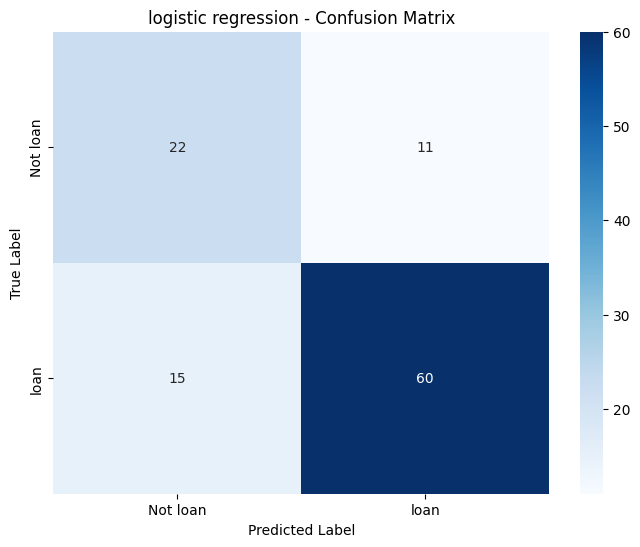

              precision    recall  f1-score   support

           0       0.59      0.67      0.63        33
           1       0.85      0.80      0.82        75

    accuracy                           0.76       108
   macro avg       0.72      0.73      0.73       108
weighted avg       0.77      0.76      0.76       108

===== knn =====
Train Accuracy: 0.8683,   Test Accuracy: 0.7685
[[20 13]
 [12 63]]


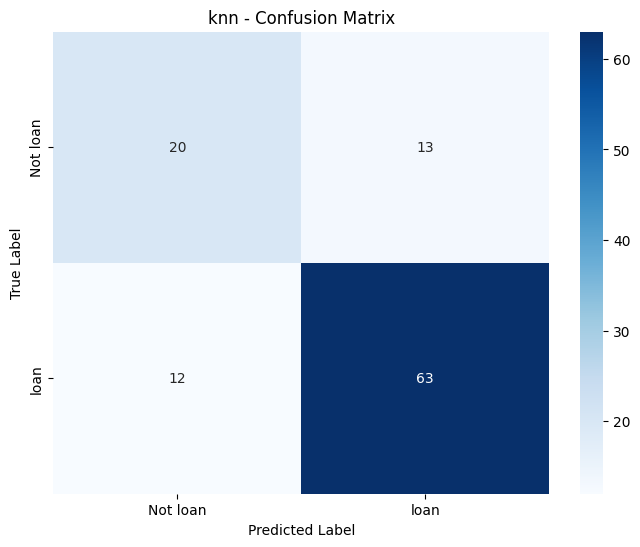

              precision    recall  f1-score   support

           0       0.62      0.61      0.62        33
           1       0.83      0.84      0.83        75

    accuracy                           0.77       108
   macro avg       0.73      0.72      0.72       108
weighted avg       0.77      0.77      0.77       108

===== Random Forest =====
Train Accuracy: 0.9750,   Test Accuracy: 0.7963
[[18 15]
 [ 7 68]]


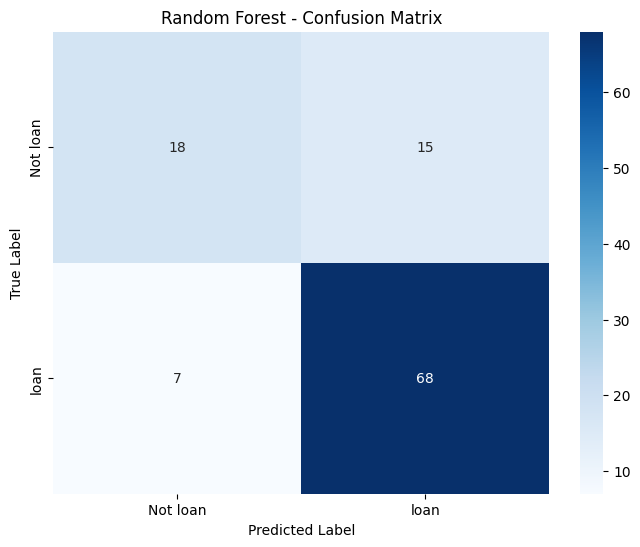

              precision    recall  f1-score   support

           0       0.72      0.55      0.62        33
           1       0.82      0.91      0.86        75

    accuracy                           0.80       108
   macro avg       0.77      0.73      0.74       108
weighted avg       0.79      0.80      0.79       108

===== ExtraTrees =====
Train Accuracy: 1.0000,   Test Accuracy: 0.7870
[[20 13]
 [10 65]]


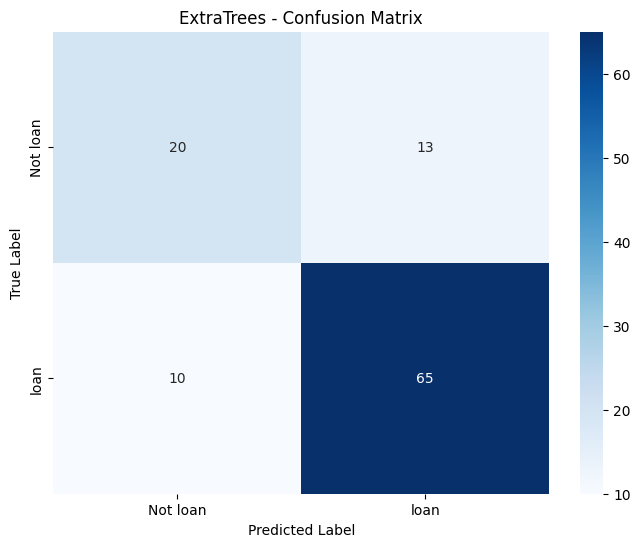

              precision    recall  f1-score   support

           0       0.67      0.61      0.63        33
           1       0.83      0.87      0.85        75

    accuracy                           0.79       108
   macro avg       0.75      0.74      0.74       108
weighted avg       0.78      0.79      0.78       108

===== Bagging =====
Train Accuracy: 0.9933,   Test Accuracy: 0.8426
[[23 10]
 [ 7 68]]


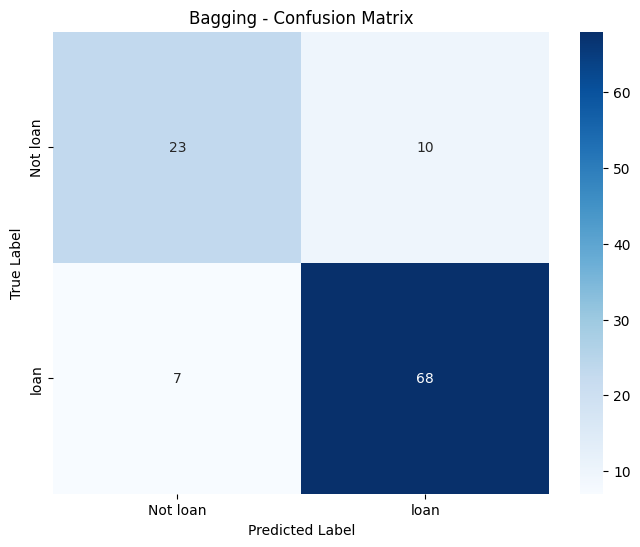

              precision    recall  f1-score   support

           0       0.77      0.70      0.73        33
           1       0.87      0.91      0.89        75

    accuracy                           0.84       108
   macro avg       0.82      0.80      0.81       108
weighted avg       0.84      0.84      0.84       108



In [352]:
accuracy=[]
for model_name , model in models.items():
    model.fit(X_resample,y_resample )
    y_pred_train = model.predict(X_resample)
    y_pred_test = model.predict(x_test)

    Acc_Train = accuracy_score(y_resample,y_pred_train)
    Acc_Test  =  accuracy_score(y_test,y_pred_test)


    Pre_Train = precision_score(y_resample,y_pred_train,average='binary')
    Pre_Test  =  precision_score(y_test,y_pred_test,average='binary')

    Rec_Train = recall_score(y_resample,y_pred_train,average='binary')
    Rec_Test  =  recall_score(y_test,y_pred_test,average='binary')

    F1_Train = f1_score(y_resample,y_pred_train,average='binary')
    F1_Test  =  f1_score(y_test,y_pred_test,average='binary')

    accuracy.append([Acc_Train,Pre_Train,Rec_Train,F1_Train,Acc_Test,Pre_Test,Rec_Test,F1_Test])
    print(f"===== {model_name} =====")
    print(f"Train Accuracy: {Acc_Train:.4f},   Test Accuracy: {Acc_Test:.4f}")
    class_names=['Not loan','loan']
    cm = confusion_matrix(y_test,y_pred_test)
    print(cm)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()
    print(classification_report(y_test,y_pred_test))

## after smote
## bagging is high accuracy is 84%